In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as pt

from mcmc import mcmc
import densities
import my_problemLR

%matplotlib notebook


## Parameter for the problem

In [2]:
# parameters for the problem
Npoint = 100

# data abscissa {Xi}
my_problemLR.Xi = np.random.rand(Npoint)
my_problemLR.sigmad = 0.1 # sec

## Linear regression coefficients to be found

In [3]:
slope = 2.
intercept = 1.

## Create "observed data"

In [4]:
#  Data value = {Yi}
my_problemLR.Yi = slope * my_problemLR.Xi + intercept + np.random.randn(Npoint) * my_problemLR.sigmad

## Trial solution

In [5]:
X0 = np.array([10., 10.])

## Run MCMC

In [6]:
# set the step Dernier param : 'Gaus' ou autre
step = np.array([0.01, 0.01])# *2 or *5 or *10

niter = 100000


mout, mMAP, accrate = mcmc(my_problemLR.logprior, my_problemLR.loglikelyhood,
                           densities.generate, densities.logproposal, X0, niter, step, 'Gaus')

## Plot solutions

<IPython.core.display.Javascript object>


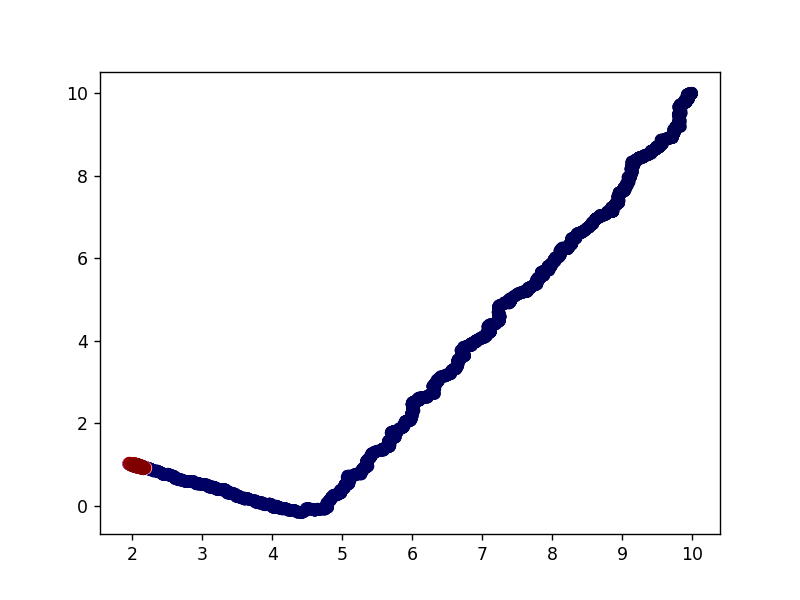

acceptanceRate 0.64929
Solution with highest probability is  [2.07186897 0.96124195]


In [7]:
x=mout[:,0]
y=mout[:,1]
pt.figure()
print('acceptanceRate',accrate)
pt.scatter(x,y,cmap= pt.get_cmap('seismic'), c = np.arange(len(x))/len(x))
print('Solution with highest probability is ',mMAP)

Permet de suivre l'avancement de l'iération, commencement à (10,10) et finis à environ (2,1). Valeur plus haut trés sombre car la majorité se trouve à gauche. Système trés convergent.

### Defining the burning period

<IPython.core.display.Javascript object>


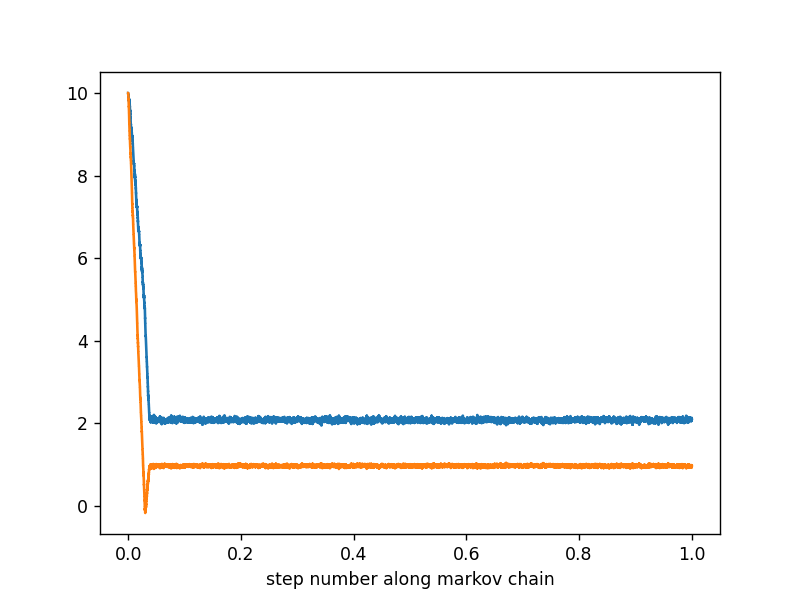

In [8]:
pt.figure()
iter=np.arange(0.,niter)
pt.plot(iter/niter,mout[:,0],iter/niter,mout[:,1])
pt.xlabel('step number along markov chain');

Même chôse que plus haut, la majorité des valeurs se trouvent trés proche de la zone d'équilibre.

In [9]:
burning_period = int(0.2*niter)
a = mout[burning_period:-1,0]
b = mout[burning_period:-1,1]
a.shape

(79999,)

### Defining approximately the correlation length

<IPython.core.display.Javascript object>


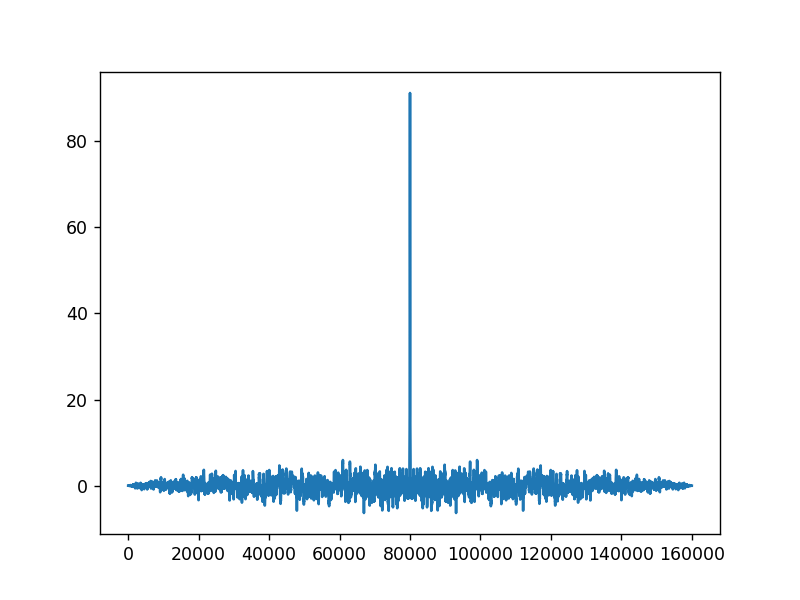

In [10]:
import scipy.signal as sig

pt.figure()
pt.plot(sig.correlate(a-np.mean(a),a-np.mean(a)))

### Create a "true" Markov-chain after removal of the burning period and after getting rid of correlation

In [11]:
a=a[0:-1:200]
b=b[0:-1:200]
a.shape

(400,)

<IPython.core.display.Javascript object>


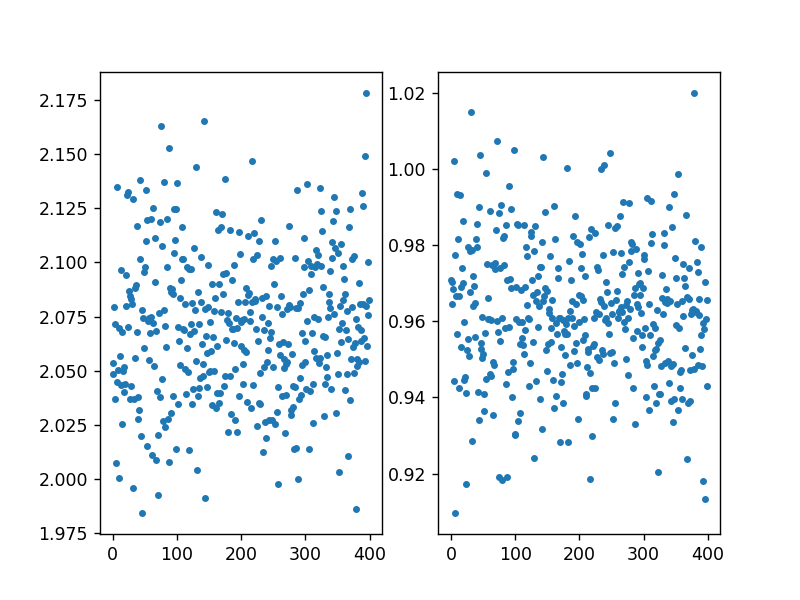

In [12]:
pt.figure()
pt.subplot(1,2,1)
pt.plot(a,'.')
pt.subplot(1,2,2)
pt.plot(b,'.')

In [13]:
print(mMAP,np.mean(a),np.mean(b))

[2.07186897 0.96124195] 2.070598711202648 0.9621880883330354


## Represent histogram for slope and intercept

<IPython.core.display.Javascript object>


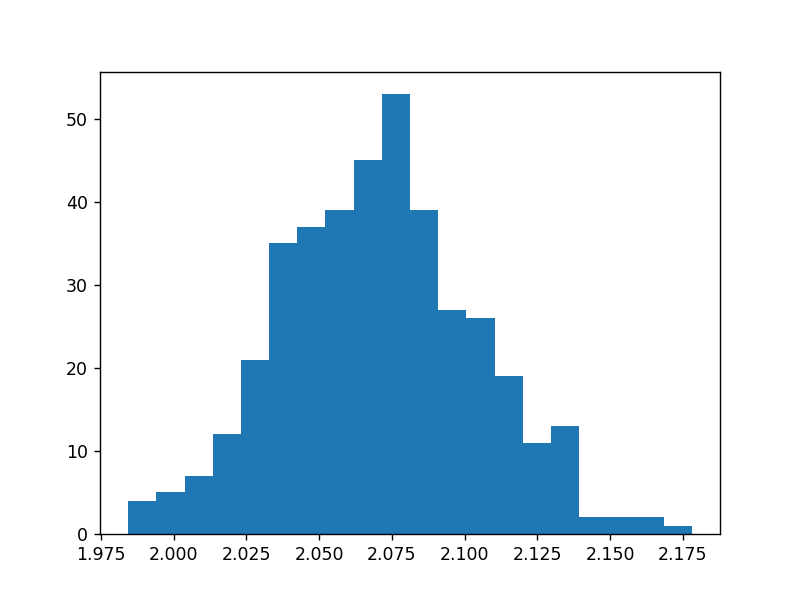

In [14]:
#hist, bins = np.histogram(mout[:, 2])
pt.figure()
#hist, bins = np.histogram(Z)
pt.hist(a,20);

<IPython.core.display.Javascript object>


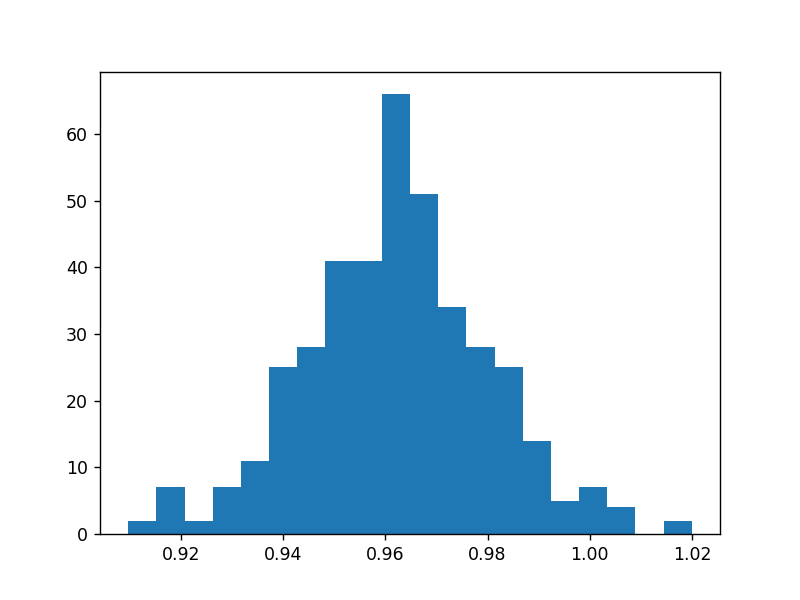

In [15]:
#hist, bins = np.histogram(mout[:, 2])
pt.figure()
#hist, bins = np.histogram(Z)
pt.hist(b,20);

In [16]:
def fn(ai,bi, a,b, x,sig):
    yi = ai * x + bi
    y = a * x + b
    res = (yi-y)/sig
    return np.sum(res)

In [17]:
tot = []
for i in range(len(a)):
    ai, bi = a[i], b[i]
    tot.append(fn(ai,bi, slope, intercept,my_problemLR.Xi,my_problemLR.sigmad))

<IPython.core.display.Javascript object>


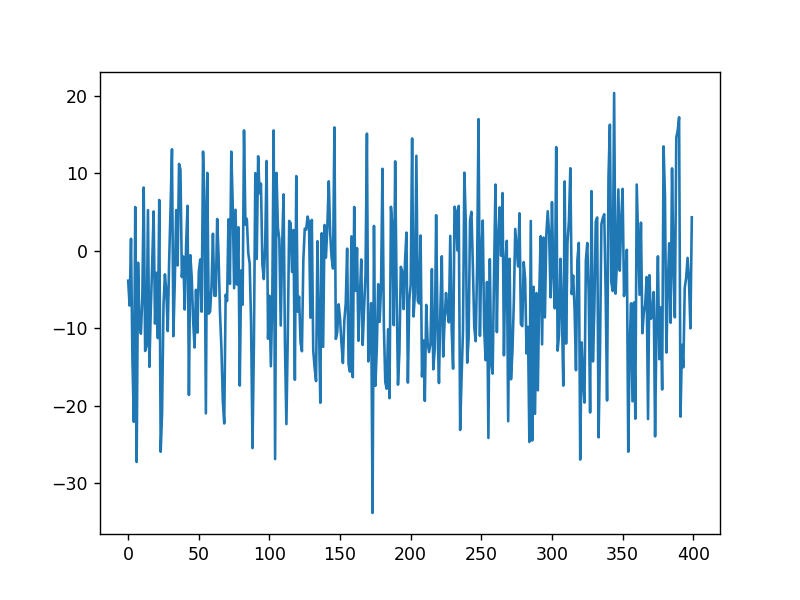

In [18]:
pt.figure()
pt.plot(tot)